# **Introduction to TensorFlow Lesson 9. NLP: Tokenization and Embeddings**


Focus of this lesson is on Tokenization and Word Embeddings.

<br>

**Tokenization**   
A way to represent letters/word in numerical format, such that we can then feed them as sequences to a neural network.

<br>

**Embeddings**   
Focuses on how neural networks would internalise representaions of different words. Later in this section, *implement a basic sentiment analysis*



## **Tokenization**




**Tokenization** Focuses on how we can represent text and words in a numerical format.

<br>

**Naieve solution**   
A naieve solution to this problem would be to encode each letter with a numerical value and then represent whole words by the encoded letters.


Example   
S T R E S S E D => 83, 84, 82, 69, 83, 83, 69, 68

<br>

The issue with this approach comes from anagrams, different words spelt using the same set of letters. To us they have different meaning but to our models, since they have the same numerical encoding they are the same. 

Example   
D E S S E R T S => 68, 69, 83, 83, 69, 82, 84, 83


<br>

**Tokenize words not letters**   
It would be much better to move 1 level higher, so as opposed to tokenizing letters we can tokenize words. 

Stressed => 1   
Desserts => 2

<br>

**Sequences**    
Cool so we can represent words with number. But words in a sequences form sentences, which have different meaning based on the order in which they appear in the sentence.   
Hence it's not enough to simply convert into a individual tokens, we can convert sentences into sequence of tokens.

<br>

**Summary**
- Tokenization is creating a numerical encoding of words and sentences.
- Each individual word is assigned a unique number
- Sentences formed from the tokenized words can then be converted into sequences.

In [93]:
# Import the tokenizer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

print(tf.__version__)

2.8.0


In [94]:
# Add some sentences to be tokenized.
# I've chosen the lyrics to Jay-Z's run this town ft Rihanna & Kanye west. I just happen to be listening to this song at the time of writing

Run_this_town = [
                "Feel it comin' in the air",
                "Hear the screams from everywhere",
                "I'm addicted to the thrill",
                "It's a dangerous love affair",
                "Can't be scared when it goes down"
                "Got a problem, tell me now",
                "Only thing that's on my mind",
                "Is who's gonna run this town tonight...", # curious to see how it handless the ...
                "Is who's gonna run this town tonight...",
                "We gonna run this town"
                 
]


In [95]:
# define the tokenizer and fit it to the list of sentences

tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(Run_this_town)


***Note on oov_token***

The tokenizer defined above would encode the 1000 most common words in the list of sentences into numbers. The encoded words are defined in a word index, which is essentially a map between the word and it's token.

**Out of vocabulary tokens**   
Words that were not tokenized would be represented by a default value, which is what the out of vocabulary token represents.

In [96]:
# display the word index
print(tokenizer.word_index)

{'<OOV>': 1, 'the': 2, 'gonna': 3, 'run': 4, 'this': 5, 'town': 6, 'it': 7, 'a': 8, 'is': 9, "who's": 10, 'tonight': 11, 'feel': 12, "comin'": 13, 'in': 14, 'air': 15, 'hear': 16, 'screams': 17, 'from': 18, 'everywhere': 19, "i'm": 20, 'addicted': 21, 'to': 22, 'thrill': 23, "it's": 24, 'dangerous': 25, 'love': 26, 'affair': 27, "can't": 28, 'be': 29, 'scared': 30, 'when': 31, 'goes': 32, 'downgot': 33, 'problem': 34, 'tell': 35, 'me': 36, 'now': 37, 'only': 38, 'thing': 39, "that's": 40, 'on': 41, 'my': 42, 'mind': 43, 'we': 44}


hmmm....

- looking at the word index, it ignored the ...
- words like who's and can't are counted as a single word and not two seperate words
- Also it seems like in total there are 43 unique words in the list of sentences

In [97]:
# We can also view each sentences as sequences

Run_this_town_sequence = tokenizer.texts_to_sequences(Run_this_town)

for sequence in Run_this_town_sequence:
  print(sequence)


[12, 7, 13, 14, 2, 15]
[16, 2, 17, 18, 19]
[20, 21, 22, 2, 23]
[24, 8, 25, 26, 27]
[28, 29, 30, 31, 7, 32, 33, 8, 34, 35, 36, 37]
[38, 39, 40, 41, 42, 43]
[9, 10, 3, 4, 5, 6, 11]
[9, 10, 3, 4, 5, 6, 11]
[44, 3, 4, 5, 6]


We can see that some of the sequences have different lengths. We would solve this later with padding and truncating.

In [98]:
# Lets try to add in a new set of sentences and see what sequence we get out of it.

Run_this_town_2 = [
                  "We are",
                  "Yeah I said it",
                  "We are",
                  "This is Roc Nation",
                  "Pledge your allegiance",
                  "Get y'all black tees on",
                  "All black everything",
                  "Black cards, black cars",
                  "All black everything",
                  "And our girls are blackbirds",
                  "Ridin' with they dillingers",
                  "I'd get more in depth",
                  "If you boys really real enough",
                  "This is la familia",
                  "I'll explain later",
                  "But for now let me get back to this paper",
                  "I'm a couple bands down and I'm tryin' to get back",
                  "I gave Doug a grip, I lost a flip for five stacks",
                  "Yeah I'm talkin' five comma",
                  "Six zeros",
                  "Dot zero",
                  "Here it go",
                  "Back to runnin' circles 'round n***",
                  "Now we squared up",
                  "Hold up"
]


In [99]:
Run_this_town_2_sequence = tokenizer.texts_to_sequences(Run_this_town_2)

for sequence in Run_this_town_2_sequence:
  print(sequence)
  

[44, 1]
[1, 1, 1, 7]
[44, 1]
[5, 9, 1, 1]
[1, 1, 1]
[1, 1, 1, 1, 41]
[1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1]
[1, 1, 1, 1, 1]
[1, 1, 1, 1]
[1, 1, 1, 14, 1]
[1, 1, 1, 1, 1, 1]
[5, 9, 1, 1]
[1, 1, 1]
[1, 1, 37, 1, 36, 1, 1, 22, 5, 1]
[20, 8, 1, 1, 1, 1, 20, 1, 22, 1, 1]
[1, 1, 1, 8, 1, 1, 1, 8, 1, 1, 1, 1]
[1, 20, 1, 1, 1]
[1, 1]
[1, 1]
[1, 7, 1]
[1, 22, 1, 1, 1, 1]
[37, 44, 1, 1]
[1, 1]


From the output we can see that, there are lots of new words that were not previous present in the initial set of sentences that we fit our tokenizer on.

In [100]:
# Now to correct the issue of having sequences with different lengths.

from tensorflow.keras.preprocessing.sequence import pad_sequences


Towards preparing texts to be used to train our neural network. We need our sequences to have the same length. We can do this with pad_seqeunces.

In [101]:
# The default behaviour of the pad sequence is to ensure that all the sequence 
# would have the same length as the longest sequence in the list.
# Padding is done by adding 0
padded_sequence = pad_sequences(Run_this_town_sequence)

for sequence in padded_sequence:
  print(sequence)

[ 0  0  0  0  0  0 12  7 13 14  2 15]
[ 0  0  0  0  0  0  0 16  2 17 18 19]
[ 0  0  0  0  0  0  0 20 21 22  2 23]
[ 0  0  0  0  0  0  0 24  8 25 26 27]
[28 29 30 31  7 32 33  8 34 35 36 37]
[ 0  0  0  0  0  0 38 39 40 41 42 43]
[ 0  0  0  0  0  9 10  3  4  5  6 11]
[ 0  0  0  0  0  9 10  3  4  5  6 11]
[ 0  0  0  0  0  0  0 44  3  4  5  6]


In [102]:
# As opposed to using the length longest sequence in the list, we can also specify the length we want for all the sequence
# Note that for sequences longer that the length we want, these sequences would be truncated.

padded_sequence = pad_sequences(Run_this_town_sequence, maxlen=5)

for sequence in padded_sequence:
  print(sequence)

[ 7 13 14  2 15]
[16  2 17 18 19]
[20 21 22  2 23]
[24  8 25 26 27]
[ 8 34 35 36 37]
[39 40 41 42 43]
[ 3  4  5  6 11]
[ 3  4  5  6 11]
[44  3  4  5  6]


Observe that a lot of the words in the 5th sequences were removed.

Question??
- How does it decide what to remove
  - it seems like it simply starts removing from the start of the sequence.
  - We can control if it adds or remove from the start or end of the sequence.

In [103]:
# Padding & Truncating from the end of the sequence
padded_sequence = pad_sequences(Run_this_town_sequence, maxlen=7, padding="post")

for sequence in padded_sequence:
  print(sequence)

[12  7 13 14  2 15  0]
[16  2 17 18 19  0  0]
[20 21 22  2 23  0  0]
[24  8 25 26 27  0  0]
[32 33  8 34 35 36 37]
[38 39 40 41 42 43  0]
[ 9 10  3  4  5  6 11]
[ 9 10  3  4  5  6 11]
[44  3  4  5  6  0  0]


## **Word Embedding**

An **embedding** is a cluster of vectors in a multidimensional space.
Where each vector represents a given word. We can create an embedding using an embedding layer in tensorflow.

<br/>

Inputs to the embedding layer is a tokenized sequence. We would create the embedding layer by defining
- The maximum length of sequence
- The size of the word vocabulary
- Embedding dimension

<br/>

The output from an embedding layer would then be flatten or passed through a globalaverage pool layer before going through the different layers in an NLP model.

### **Get some data**

Following the colab notesbooks from the course.
- Download datasets containing Amazon and yelp reviews along with related sentiment (1 for positive sentiment, 0 for negative sentiment).

In [104]:
# download the csv file
!wget --no-check-certificate \
    -O /tmp/sentiment.csv https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P

--2022-03-14 19:48:13--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 142.250.81.206, 2607:f8b0:4004:837::200e
Connecting to drive.google.com (drive.google.com)|142.250.81.206|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ckm15kj3rtnfq8kf55hiu3u8vnacncs9/1647287250000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P [following]
--2022-03-14 19:48:13--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ckm15kj3rtnfq8kf55hiu3u8vnacncs9/1647287250000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)... 142.250.65.65, 2607:f8b0:4004:832::2001
Connecting to doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)|142.250.65.65|:443... co

In [105]:
import numpy as np
import pandas as pd

# read the csv as a pandas dataset
dataset = pd.read_csv('/tmp/sentiment.csv')

# get the sentences and the sentiment 
sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()


In [106]:
# display the first 5 reviews and sentiment
for review, label in zip(sentences[:5], labels[:5]):
  print("\nReview: {}".format(review))
  print("Sentiment: {}".format(label))
  



Review: So there is no way for me to plug it in here in the US unless I go by a converter.
Sentiment: 0

Review: Good case Excellent value.
Sentiment: 1

Review: Great for the jawbone.
Sentiment: 1

Review: Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!
Sentiment: 0

Review: The mic is great.
Sentiment: 1


In [107]:
# Seperate the sentences and labels into training and test sets
# 80% for training and 20% for testing

training_size = int(len(sentences)*0.8)

# define training data
training_sentences = sentences[0:training_size]
training_labels = labels[0:training_size]

# define testing data
testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]



### **Tokenize the dataset**

In [108]:
# define a Tokenizer
Review_Tokenizer = Tokenizer(num_words=1000, oov_token="<00V>")

# fit the tokenizer on the training sentences
Review_Tokenizer.fit_on_texts(training_sentences)


In [109]:
# display the word index (mapping from word to token)
word_index = Review_Tokenizer.word_index


# display first 10 values
for index, key in enumerate(word_index.keys()):
  print("Word: {},  Token: {}".format(key, word_index[key]))
  if index == 10:
    break


Word: <00V>,  Token: 1
Word: the,  Token: 2
Word: and,  Token: 3
Word: i,  Token: 4
Word: it,  Token: 5
Word: a,  Token: 6
Word: is,  Token: 7
Word: to,  Token: 8
Word: this,  Token: 9
Word: was,  Token: 10
Word: of,  Token: 11


In [110]:
# converts the sentences into reviews
review_sequences = Review_Tokenizer.texts_to_sequences(training_sentences)


In [111]:
# display some of the sequences

for sequence in review_sequences[:10]:
  print(sequence)

[26, 68, 7, 63, 173, 13, 67, 8, 218, 5, 16, 82, 16, 2, 197, 363, 4, 75, 109, 6, 1]
[20, 90, 76, 364]
[19, 13, 2, 613]
[1, 8, 137, 13, 614, 810, 94, 70, 811, 130, 1, 198]
[2, 505, 7, 19]
[4, 23, 8, 1, 2, 218, 8, 91, 5, 8, 422, 56, 131, 8, 91, 423, 199]
[46, 24, 23, 238, 1, 85, 238, 1, 615, 125, 1, 2, 616, 11, 506, 365, 11, 116, 39, 109, 39]
[46, 24, 28, 424, 1, 24, 322, 23, 9]
[1, 8, 174, 4, 812, 12, 119]
[95, 6, 141, 11, 119, 3, 37]


In [112]:
# Get all the sequences into the same length

padded_review_sequences = pad_sequences(review_sequences, maxlen=100,
                                        padding='post', truncating='post')

for sequence in padded_review_sequences[:10]:
  print(sequence)



[ 26  68   7  63 173  13  67   8 218   5  16  82  16   2 197 363   4  75
 109   6   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
[ 20  90  76 364   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
[ 19  13   2 613   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0

In [113]:
# Apply the whole process to the test dataset

testing_sequence = Review_Tokenizer.texts_to_sequences(testing_sentences)
testing_sequences_padded = pad_sequences(testing_sequence, maxlen=100,
                                         padding='post', truncating='post')


Some code to help with visualizing the word embedding later.

In [114]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded_review_sequences[1]))
print(training_sentences[1])
print(training_labels[1])

good case excellent value ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
Good case Excellent value.
1


In [115]:
padded_review_sequences[1]

array([ 20,  90,  76, 364,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [116]:
print(training_sentences[1])

Good case Excellent value.


### **Train a basic sentiment model**

In [117]:
# define a basic sentiment model
NLP_model = tf.keras.Sequential([
                                 tf.keras.layers.Embedding(1000, 16, input_length=100),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(6, activation='relu'),
                                 tf.keras.layers.Dense(1, activation='sigmoid')])

NLP_model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

NLP_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           16000     
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 6)                 9606      
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 25,613
Trainable params: 25,613
Non-trainable params: 0
_________________________________________________________________


In [118]:
# fit the model into the sequences

try:
  NLP_model.fit(padded_review_sequences, training_labels, epochs=10,
                validation_data=(testing_sequences_padded, testing_labels))

except Exception as e:
  print(e)
  

Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})


In [119]:
# the labels need to be a numpy array
training_label_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [120]:
NLP_model.fit(padded_review_sequences, training_label_final, epochs=10, 
              validation_data=(testing_sequences_padded, testing_labels_final))

Epoch 1/10
50/50 [==============================] - 1s 6ms/step - loss: 0.6914 - accuracy: 0.5392 - val_loss: 0.6989 - val_accuracy: 0.4110
Epoch 2/10
50/50 [==============================] - 0s 3ms/step - loss: 0.6797 - accuracy: 0.5342 - val_loss: 0.6913 - val_accuracy: 0.4687
Epoch 3/10
50/50 [==============================] - 0s 4ms/step - loss: 0.6499 - accuracy: 0.5982 - val_loss: 0.6830 - val_accuracy: 0.4586
Epoch 4/10
50/50 [==============================] - 0s 4ms/step - loss: 0.5940 - accuracy: 0.6880 - val_loss: 0.6491 - val_accuracy: 0.6115
Epoch 5/10
50/50 [==============================] - 0s 4ms/step - loss: 0.5306 - accuracy: 0.7822 - val_loss: 0.6485 - val_accuracy: 0.5614
Epoch 6/10
50/50 [==============================] - 0s 3ms/step - loss: 0.4559 - accuracy: 0.8650 - val_loss: 0.5204 - val_accuracy: 0.7594
Epoch 7/10
50/50 [==============================] - 0s 3ms/step - loss: 0.2877 - accuracy: 0.9416 - val_loss: 0.4647 - val_accuracy: 0.7820
Epoch 8/10
50/50 [==

So it seems like out model is able to predict the sentiment really well for a given review.

### **Make a predictions using the sentiment model**

*Surprise* it doesn't work
....
 Debugging

In [121]:
# lets try out the model with sentences from the test dataset
print(testing_sentences[25])
print(testing_labels[25])

print('\n==============================================================\n')

print(testing_sequences_padded[25])
print(testing_labels_final[25])


Best of luck to the rude and non-customer service focused new management.
0


[ 55  11   1   8   2 606   3   1 232  30   1 120 485   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
0


In [122]:
# try to make a sentiment prediction using a sequence from the test data

example_test_sequence = testing_sequences_padded[25]

try:
  NLP_model.predict(example_test_sequence)

except Exception as e:
  print(e)


in user code:

    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1751, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.7/dist-packages/keras/engine/input_spec.py", line 249, in assert_input_compatibility
        f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Except

debugging the above error.

In [123]:
# get the first layer
embedding = NLP_model.layers[0]

# pass in the input to the first layer
word_embedding = embedding(example_test_sequence)
print(word_embedding)

# pass the output to the second layer
flat = NLP_model.layers[1]
output_2 = flat(word_embedding)

print("\n==========\n")
print(output_2)

# pass the output to the third layer
dense = NLP_model.layers[2]

try:
  output_3 = dense(output_2)

  print("\n=========\n")
  print(output_3)

except Exception as e:
  print("Error: {}".format(e))

tf.Tensor(
[[ 0.22880928 -0.22285861 -0.19613479 ...  0.25783017 -0.28434953
  -0.24522617]
 [ 0.01053355 -0.04203329  0.06451702 ...  0.07364282  0.07200455
  -0.02630654]
 [ 0.06647504  0.04839311  0.06329636 ...  0.00671943 -0.00144213
  -0.07310863]
 ...
 [-0.04233994  0.00549266  0.03012203 ...  0.03679538 -0.06717076
  -0.02331709]
 [-0.04233994  0.00549266  0.03012203 ...  0.03679538 -0.06717076
  -0.02331709]
 [-0.04233994  0.00549266  0.03012203 ...  0.03679538 -0.06717076
  -0.02331709]], shape=(100, 16), dtype=float32)


tf.Tensor(
[[ 0.22880928 -0.22285861 -0.19613479 ...  0.25783017 -0.28434953
  -0.24522617]
 [ 0.01053355 -0.04203329  0.06451702 ...  0.07364282  0.07200455
  -0.02630654]
 [ 0.06647504  0.04839311  0.06329636 ...  0.00671943 -0.00144213
  -0.07310863]
 ...
 [-0.04233994  0.00549266  0.03012203 ...  0.03679538 -0.06717076
  -0.02331709]
 [-0.04233994  0.00549266  0.03012203 ...  0.03679538 -0.06717076
  -0.02331709]
 [-0.04233994  0.00549266  0.03012203 ...

So the issue is with the third layer, it recieved an input (100, 16) but it expects the last of the input shape to have a value of 1600.

</br>

strange...

The flatten layer recieves a tensor with shape (None, 100, 16) and returns a tensor with shape (None, 1600) so the issue here is that the tensor is not flattening the tensor into the desired shape.

In [124]:
# lets try something

example_test_sequence_array = np.array(example_test_sequence)
print(example_test_sequence_array)

example_test_sequence_array_reshaped = example_test_sequence_array.reshape(-1, 100)
print(example_test_sequence_array_reshaped.shape)

[ 55  11   1   8   2 606   3   1 232  30   1 120 485   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
(1, 100)


In [125]:
NLP_model.predict(example_test_sequence_array_reshaped)

array([[0.91684616]], dtype=float32)

😁 😁 😁

In [126]:
print(testing_sentences[25])
print(testing_labels[25])


Best of luck to the rude and non-customer service focused new management.
0


Wow that took ages to get to work, but it seems like a batch dimension was added to the raw inputs so the dimension goes from (100,) -> (None, 100,)

it's a very small issue but it screws up the pipeline since the dense layer expectes an input of dimension (None, 1600) and not (100, 16). Very small issue but it causes a big problem.

<br/>

On a more sombre note. it seems like the predicted sentiment is not very close to the actual sentiment. expected 0, predicted 0.68.

In [127]:
# lets try another sentence

print(testing_sentences[42])
print(testing_labels[42])

print(testing_sequences_padded[42])

Maybe if they weren't cold they would have been somewhat edible.
0
[  1  46  43   1 805  43  44  23  93   1   1   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


damn man, some of these reviews 👀

In [128]:
# add a batch dimension

example_test_sequence = np.array(testing_sequences_padded[42])
example_test_sequence = example_test_sequence.reshape(-1, 100) # we know max length is 100


In [129]:
# make a prediction
NLP_model.predict(example_test_sequence)


array([[0.25772548]], dtype=float32)

Okay it seems to have done much better on this sentence, let try a bunch more.

In [130]:
for sequence, label, sentence in zip(testing_sequences_padded[-10:], testing_labels[-10:], testing_sentences[-10:]):
  sequence_np_array = np.array(sequence).reshape(-1, 100)
  prediction = NLP_model.predict(sequence_np_array)
  print("\nReview: {}".format(sentence))
  print("Predicted sentiment: {} and actual sentiment: {}".format(prediction, label))


Review: The refried beans that came with my meal were dried out and crusty and the food was bland.
Predicted sentiment: [[0.23757583]] and actual sentiment: 0

Review: Spend your money and time some place else.
Predicted sentiment: [[0.36927485]] and actual sentiment: 0

Review: A lady at the table next to us found a live green caterpillar In her salad.
Predicted sentiment: [[0.30631208]] and actual sentiment: 0

Review: the presentation of the food was awful.
Predicted sentiment: [[0.09972596]] and actual sentiment: 0

Review: I can't tell you how disappointed I was.
Predicted sentiment: [[0.08463317]] and actual sentiment: 0

Review: I think food should have flavor and texture and both were lacking.
Predicted sentiment: [[0.6095096]] and actual sentiment: 0

Review: Appetite instantly gone.
Predicted sentiment: [[0.2280482]] and actual sentiment: 0

Review: Overall I was not impressed and would not go back.
Predicted sentiment: [[0.03391492]] and actual sentiment: 0

Review: The who

There are more deeper analysis that we can do as opposed to simply looking at the predicted and actual sentiment, but i'll stop there for now and go back on track with the course itself

### **Visualize the word embeddings**

recap that the tensorflow projector can be used to visualize the word embeddings.

http://projector.tensorflow.org/

We can visualize the word embedding with the embedding layers weight and the words

In [131]:
import io

# create a vectors.tsv and words.tsv file
output_vector = io.open('vectors.tsv', 'w', encoding='utf-8')
output_word = io.open('words.tsv', 'w', encoding='utf-8')

# get the embedding layer weights
embedding_layer = NLP_model.layers[0]
embedding_layer_weight = embedding_layer.get_weights()[0]

# for each word in the word index get it's embedding
for i in range(1, 1000): # iterate through the number of words in the token
  word = reverse_word_index[i]
  embeddings = embedding_layer_weight[i]

  # write the embedding and word to file
  output_vector.write(word + "\n")
  output_word.write("\t".join([str(x) for x in embeddings]) + "\n")

# close both file
output_vector.close()
output_word.close()


In [132]:
# download both files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vectors.tsv')
  files.download('words.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Improving sentiment analysis model**

Notes made from lesson 9.14

<br/>

Towards improving the performance of our model, we would change
- the vocabulary size of our token,
- the max length of our token sequences
- Appy padding before or after each token
- The embedding dimension
- Change between flatten to GlobalAveragePoolingID layer.

There isn't one set answer towards improving the model's performance it comes down to intution, trying out different changes and seeing what works.

### **Subwords**

Subwords are distinct parts of words that can be broken out and might appear more than the word itself. The key benefit of subword is that it allows us to capture words that might not be captured in the corpus by the tokenizer but contain root words which appear alot.

Example
- Nevertheless -> never + the + less

Another keypoint is that words with similar sentiments, might be tokenized similarly. for example
- fame --> fame
- Famous --> fam + ous
- Famously --> fam + ous + ly

fame and fam are different subwords but seeing as out similar they are, the idea is that it might be tokenized similarly.


The focus for this lesson is to create our own subowrd from corpus using the `build_from_corpus function in Tensorflow's SubwordTextEncoder`

####**Create a subwords dataset**

In [133]:
import tensorflow_datasets as tfds

# use sentences from Amazon and Yelp reviews dataset
# set vocab size of 1000 and we don't want subwords longer than 5
subword_tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(sentences, 1000, max_subword_length=5)


it looks like SubwordTextEncoder is deprecated, maybe somthing to think about with future use

In [134]:
print(training_sentences[0])

So there is no way for me to plug it in here in the US unless I go by a converter.


In [135]:
encoded_sentence = subword_tokenizer.encode(training_sentences[0])

In [136]:
for i in encoded_sentence:
  print(subword_tokenizer.decode([i]))

So 
there
 
is 
no 
way 
for 
me 
to 
pl
ug
 
it 
in 
here 
in 
the 
U
S
 
un
less 
I 
go 
by 
a 
con
ver
ter
.


In [137]:
# display some of the subwords in the training sentences

some_training_sentences = training_sentences[4:20]

for sentence in some_training_sentences:
  print('\n', sentence)

  encoded_sentence = subword_tokenizer.encode(sentence)
  print(encoded_sentence)
  
  subwords = ''
  for token in encoded_sentence:
    subwords += f'{subword_tokenizer.decode([token])} '
  
  print(subwords)


 The mic is great.
[13, 396, 570, 7, 35, 789]
The  mi c  is  great . 

 I have to jiggle the plug to get it to line up right to get decent volume.
[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]
I  have  to  j ig gl e  the  pl ug   to  get  it  to  li ne  up  right   to  get  dec ent  vo lu me . 

 If you have several dozen or several hundred contacts then imagine the fun of sending each of them one by one.
[364, 39, 31, 69, 500, 775, 197, 293, 38, 117, 69, 500, 775, 399, 123, 475, 775, 79, 62, 86, 3, 506, 241, 683, 557, 775, 1, 429, 38, 15, 69, 123, 26, 210, 232, 15, 507, 80, 361, 478, 789]
If  you  have  se veral   do ze n  or  se veral   hu nd red   con ta ct s  then  im ag ine   the  fu n  of  se nd ing  ea ch  of  them  one  by  one . 

 If you are Razr owner...you must have this!
[364, 39, 41, 825, 840, 865, 20, 280, 444, 465, 39, 602, 8, 31, 505, 858, 776]
If  you  are  R a z r  ow ner ... you  mus t  h

it seems like it was able to pick out some subwords like
- bluetooth --> blue tooth

but it doesn't seem to be very good. For all captial words, it fully seperated it into individuals letters.

In [138]:
print(type(sentences))

<class 'list'>


In [139]:
# convert the entire sentences dataset into a tokens of subwords

tokenized_subwords_training_sentence = []
tokenized_subwords_test_sentence = []


for sentence in training_sentences:
  tokenized_subwords_training_sentence.append(subword_tokenizer.encode(sentence))

for sentence in testing_sentences:
  tokenized_subwords_test_sentence.append(subword_tokenizer.encode(sentence))


In [140]:
# check against the initial dataset

sentence = training_sentences[42]
print(sentence)
print(subword_tokenizer.encode(sentence))


print("Tokenized subwords: {}".format(tokenized_subwords_training_sentence[42]))


Nice headset priced right.
[821, 332, 131, 176, 116, 11, 474, 789]
Tokenized subwords: [821, 332, 131, 176, 116, 11, 474, 789]


Run through the pipeline to prepare the data

- tokenize the dataset
- Apply padding
- Apply word embedding to represent the words as vectors


In [141]:
# Apply padding
tokenized_subwords_training_sentence_padded = pad_sequences(tokenized_subwords_training_sentence, maxlen=50,
                                                           padding='post', truncating='post')

tokenized_subwords_test_sentence_padded = pad_sequences(tokenized_subwords_test_sentence, maxlen=50,
                                                           padding='post', truncating='post')



In [145]:
# Check that the subwords are padded

for i in range(10):
  raw_token_sequences = tokenized_subwords_training_sentence[i]
  print(raw_token_sequences, f'length: {len(raw_token_sequences)}')

  padded_token_sequences = tokenized_subwords_training_sentence_padded[i]
  print(padded_token_sequences, f'length: {len(padded_token_sequences)}')

[736, 168, 775, 7, 193, 417, 17, 94, 6, 600, 438, 775, 14, 19, 141, 19, 1, 828, 826, 775, 99, 445, 4, 174, 361, 5, 79, 227, 139, 789] length: 30
[736 168 775   7 193 417  17  94   6 600 438 775  14  19 141  19   1 828
 826 775  99 445   4 174 361   5  79 227 139 789   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0] length: 50
[625, 677, 626, 274, 380, 633, 148, 844, 789] length: 9
[625 677 626 274 380 633 148 844 789   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0] length: 50
[134, 775, 17, 1, 849, 179, 205, 52, 789] length: 9
[134 775  17   1 849 179 205  52 789   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0] length: 50
[827, 187, 11, 6, 143, 63, 17, 79, 227, 594, 331, 3, 660, 26, 313, 182, 795, 415, 374, 60, 789, 820, 8

Train a model on the subword dataset

In [152]:
NLP_model_2 = tf.keras.Sequential([
              tf.keras.layers.Embedding(1000, 16, input_length=50),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(6, activation='relu'),
              tf.keras.layers.Dense(1, activation='sigmoid')
])

NLP_model_2.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 50, 16)            16000     
                                                                 
 flatten_4 (Flatten)         (None, 800)               0         
                                                                 
 dense_8 (Dense)             (None, 6)                 4806      
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 20,813
Trainable params: 20,813
Non-trainable params: 0
_________________________________________________________________


In [153]:
# compile the model
NLP_model_2.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])


In [154]:
NLP_model_2.save_weights('Initial_Model_Weights.h5', overwrite=True)

In [155]:
# train the model on the padded tokenized subword training set and validate on the test set
history = NLP_model_2.fit(tokenized_subwords_training_sentence_padded, training_label_final, epochs=30,
                          validation_data = (tokenized_subwords_test_sentence_padded, testing_labels_final))


Epoch 1/30
50/50 [==============================] - 1s 6ms/step - loss: 0.6916 - accuracy: 0.5304 - val_loss: 0.6938 - val_accuracy: 0.5113
Epoch 2/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6776 - accuracy: 0.6403 - val_loss: 0.6926 - val_accuracy: 0.5213
Epoch 3/30
50/50 [==============================] - 0s 3ms/step - loss: 0.6424 - accuracy: 0.7219 - val_loss: 0.6591 - val_accuracy: 0.6516
Epoch 4/30
50/50 [==============================] - 0s 4ms/step - loss: 0.5560 - accuracy: 0.8223 - val_loss: 0.6478 - val_accuracy: 0.6015
Epoch 5/30
50/50 [==============================] - 0s 4ms/step - loss: 0.4291 - accuracy: 0.8701 - val_loss: 0.5662 - val_accuracy: 0.7168
Epoch 6/30
50/50 [==============================] - 0s 3ms/step - loss: 0.3088 - accuracy: 0.9190 - val_loss: 0.5447 - val_accuracy: 0.7293
Epoch 7/30
50/50 [==============================] - 0s 4ms/step - loss: 0.2157 - accuracy: 0.9611 - val_loss: 0.5999 - val_accuracy: 0.6742
Epoch 8/30
50/50 [==

it looks like the model is overfitting onto the training set

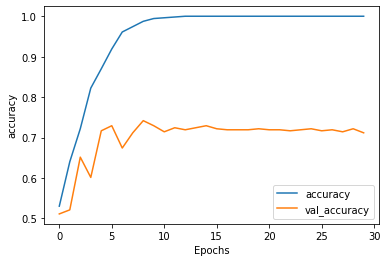

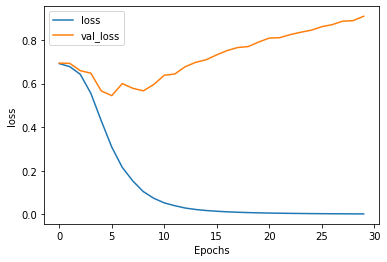

In [156]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [157]:
# reset the model weights
NLP_model_2.load_weights('Initial_Model_Weights.h5', by_name=True, skip_mismatch=False)


In [158]:
# train the model again with early stopping

EarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01,
                                                 patience=4, mode='auto', restore_best_weights=True)

# train the model on the padded tokenized subword training set and validate on the test set
history = NLP_model_2.fit(tokenized_subwords_training_sentence_padded, training_label_final, epochs=30,
                          validation_data = (tokenized_subwords_test_sentence_padded, testing_labels_final),
                          callbacks=[EarlyStopping])

Epoch 1/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5016 - val_loss: 0.6991 - val_accuracy: 0.4436
Epoch 2/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6862 - accuracy: 0.5907 - val_loss: 0.7009 - val_accuracy: 0.4737
Epoch 3/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6722 - accuracy: 0.6535 - val_loss: 0.6970 - val_accuracy: 0.4962
Epoch 4/30
50/50 [==============================] - 0s 4ms/step - loss: 0.6390 - accuracy: 0.7250 - val_loss: 0.6606 - val_accuracy: 0.6241
Epoch 5/30
50/50 [==============================] - 0s 3ms/step - loss: 0.5522 - accuracy: 0.8117 - val_loss: 0.6155 - val_accuracy: 0.7018
Epoch 6/30
50/50 [==============================] - 0s 4ms/step - loss: 0.4084 - accuracy: 0.8845 - val_loss: 0.5623 - val_accuracy: 0.7218
Epoch 7/30
50/50 [==============================] - 0s 4ms/step - loss: 0.2695 - accuracy: 0.9379 - val_loss: 0.5725 - val_accuracy: 0.7068
Epoch 8/30
50/50 [==

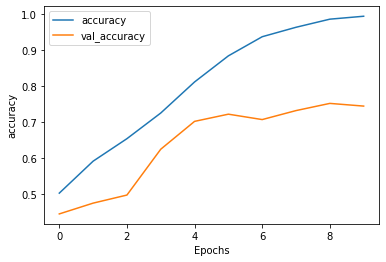

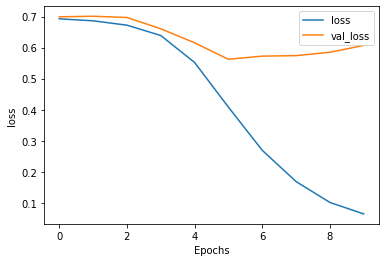

In [159]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")